# Astropy Tables

In [1]:
from astropy.table import Table

filename = 'coma_z_results.fits'
coma_results = Table.read(filename)

In [2]:
coma_results

ra,dec,z
float64,float64,float64
203.93122,33.560902,0.02648355
203.97255,33.634705,0.02476034
203.92797,34.063352,0.03975634
203.91794,33.877849,0.02481808
203.8619,33.72504,0.02343154
203.84238,33.797803,0.02529664
203.91184,33.668692,0.02609686
203.73864,34.044082,0.02364822
203.77933,33.592536,4.444412e-05


In [3]:
coma_results.info()

<Table length=11580>
name  dtype 
---- -------
  ra float64
 dec float64
   z float64


In [4]:
coma_results.colnames

['ra', 'dec', 'z']

In [5]:
# Extract columns

coma_results['ra'][:5]

203.93122
203.97255
203.92797
203.91794
203.8619


In [6]:
type(coma_results)

astropy.table.table.Table

In [7]:
type(coma_results['ra'])

astropy.table.column.Column

In [9]:
# Row

coma_results[10]

ra,dec,z
float64,float64,float64
203.64579,33.627982,0.02389758


In [10]:
# Element

coma_results['ra'][10]

np.float64(203.64579)

In [11]:
coma_results[0]['ra']

np.float64(203.93122)

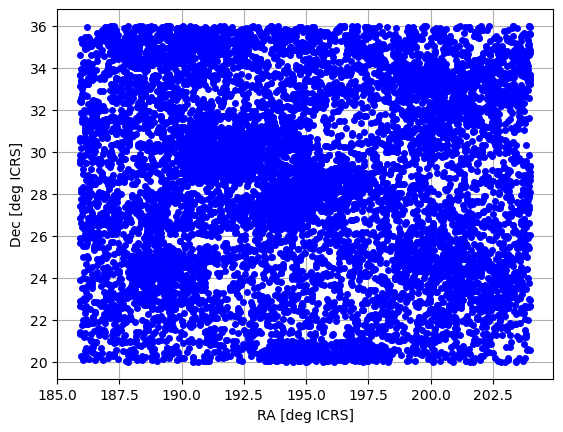

In [14]:
# Plot
import matplotlib.pyplot as plt

x = coma_results['ra']
y = coma_results['dec']

fig, ax = plt.subplots()

ax.plot(x, y, 'bo', ms=4)  # ms = markersize
ax.set_xlabel('RA [deg ICRS]')
ax.set_ylabel('Dec [deg ICRS]')
ax.grid()
fig.savefig('coma.png')
plt.show()

## Exercise

markersize:  ms to another value

alpha     :  change degree of transparency (0-1)

# Pandas

## Converting astropy tables to Pandas tables

In [17]:
import pandas as pd

results_df = coma_results.to_pandas()

In [18]:
results_df

,ra,dec,z
0,203.93122,33.560902,0.026484
1,203.97255,33.634705,0.024760
2,203.92797,34.063352,0.039756
3,203.91794,33.877849,0.024818
4,203.86190,33.725040,0.023432
...,...,...,...
11575,203.73511,34.165741,0.000032
11576,203.68167,34.026783,0.000005
11577,203.73912,34.044758,0.023833
11578,204.00092,33.665516,0.000330


## Exploring Pandas Dataframes

In [19]:
results_df.shape

(11580, 3)

In [24]:
results_df.head(2)

,ra,dec,z
0,203.93122,33.560902,0.026484
1,203.97255,33.634705,0.024760


In [25]:
results_df.tail(2)

,ra,dec,z
11578,204.00092,33.665516,0.00033
11579,203.99045,33.631033,0.00049


# Saving a Data Frame

HDF5

In [27]:
filename = 'coma_z_df.hdf'
results_df.to_hdf(filename, key='results_df', mode='w')

In [36]:
from os.path import getsize
MB = 1024 * 1024
string_format = 'Size of HDF is {0:.2f} MB and {1:.1f} potatoes'
print(string_format.format(getsize(filename)/MB, 100))

Size of HDF is 0.59 MB and 100.0 potatoes


## Alternatives

Pickle

In [30]:
filename = 'coma_z_df.pkl'
results_df.to_pickle(filename)

In [32]:
from os.path import getsize
MB = 1024 * 1024
print('Size of Pickle is {0:.2f} MB'.format(getsize(filename)/MB))

Size of Pickle is 0.27 MB


JSON

In [33]:
filename = 'coma_z_df.json'
results_df.to_json(filename)

In [34]:
from os.path import getsize
MB = 1024 * 1024
print('Size of JSON is {0:.2f} MB'.format(getsize(filename)/MB))

Size of JSON is 0.59 MB


# Read a saved dataframe

In [37]:
import pandas as pd

filename = 'coma_z_df.hdf'
results_df = pd.read_hdf(filename)

In [38]:
results_df

,ra,dec,z
0,203.93122,33.560902,0.026484
1,203.97255,33.634705,0.024760
2,203.92797,34.063352,0.039756
3,203.91794,33.877849,0.024818
4,203.86190,33.725040,0.023432
...,...,...,...
11575,203.73511,34.165741,0.000032
11576,203.68167,34.026783,0.000005
11577,203.73912,34.044758,0.023833
11578,204.00092,33.665516,0.000330


In [39]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11580 entries, 0 to 11579
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      11580 non-null  float64
 1   dec     11580 non-null  float64
 2   z       11580 non-null  float64
dtypes: float64(3)
memory usage: 361.9 KB


In [40]:
results_df.describe()

,ra,dec,z
count,11580.000000,11580.000000,1.158000e+04
mean,194.792484,28.497571,9.740559e-03
std,4.893065,4.387377,1.285723e-02
min,185.904180,19.981245,4.679875e-08
25%,190.700790,25.078895,1.308081e-04
50%,194.638050,28.467779,4.897517e-04
75%,199.001942,32.208117,2.272564e-02
max,204.011840,35.980753,3.997859e-02


# Exercise 

Review the summary statistics:

1. Do you think that the values makes sense knowing the context ?
2. Do you see any problems ?

## Exercise

Center:  12h59m48.7s + 27d58m50s   (ICRS)

Compute an array of angular separations between the center of the cluster and the galaxies.


In [48]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Coma center
center = SkyCoord("12h59m48.7s + 27d58m50s", frame='icrs')

# Galaxies
a, d = results_df['ra'].values, results_df['dec'].values
galaxies = SkyCoord(ra=a * u.degree, dec=d * u.degree , frame='icrs')

# Angular separation
sep = galaxies.separation(center)

In [67]:
results_df['separation'] = sep
results_df

,ra,dec,z,separation
0,203.93122,33.560902,0.026484,9.514325
1,203.97255,33.634705,0.024760,9.583860
2,203.92797,34.063352,0.039756,9.798426
3,203.91794,33.877849,0.024818,9.683860
4,203.86190,33.725040,0.023432,9.558361
...,...,...,...,...
11575,203.73511,34.165741,0.000032,9.731031
11576,203.68167,34.026783,0.000005,9.612274
11577,203.73912,34.044758,0.023833,9.661221
11578,204.00092,33.665516,0.000330,9.620618


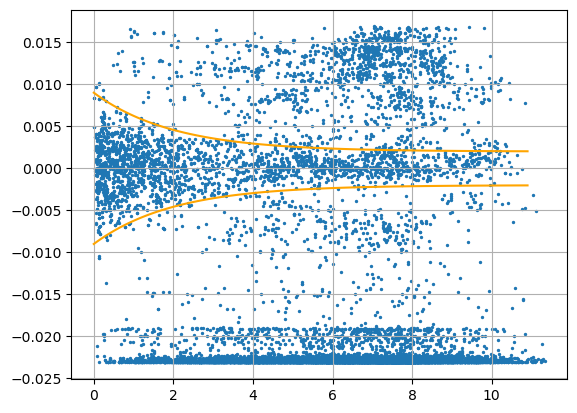

In [68]:
import matplotlib.pyplot as plt
import numpy as np

z0 = 0.0231
z = results_df['z'].values
plt.scatter(sep, z-z0, s=2)

x = np.arange(0,11,0.1)
y = 0.007 * np.exp(-0.5 * x) + 0.002
plt.plot(x, y, color='orange')
plt.plot(x, -y, color='orange')

plt.grid()
plt.show()

In [69]:
ysep = 0.007 * np.exp(-0.5 * sep.value) + 0.002
idx = np.abs(z-z0) < ysep

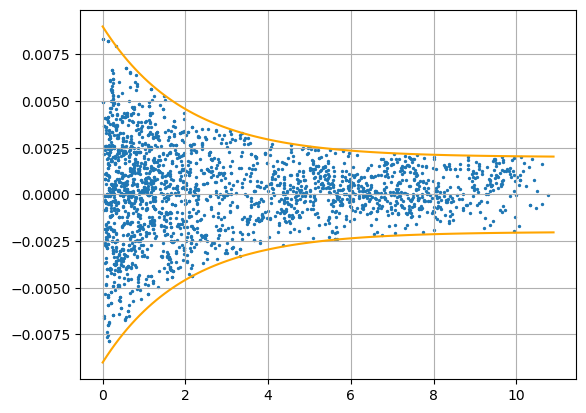

In [70]:
plt.scatter(sep[idx], (z-z0)[idx], s=2)
x = np.arange(0,11,0.1)
y = 0.007 * np.exp(-0.5 * x) + 0.002
plt.plot(x, y, color='orange')
plt.plot(x, -y, color='orange')

plt.grid()

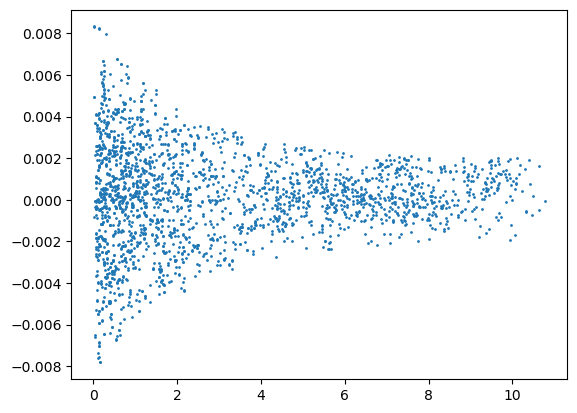

In [71]:
# Limit choice to points inside the two curves
ra, dec = results_df['ra'].values[idx], results_df['dec'].values[idx]
z = (z - z0)[idx]
d = sep.value[idx]

# Order by distance
sidx = np.argsort(d)

ra = ra[sidx]
dec = dec[sidx]
z = z[sidx]
d = d[sidx]

plt.scatter(d,z,s=1)

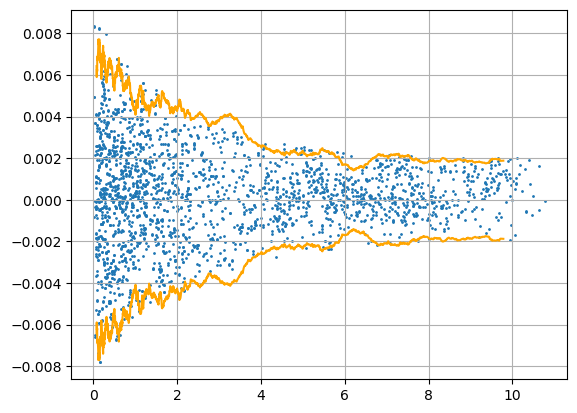

In [75]:
window = 80
zw = np.lib.stride_tricks.sliding_window_view(z, window)
zvar = np.nanstd(zw, axis=-1)
dw = np.lib.stride_tricks.sliding_window_view(d, window)
dvar = np.nanmean(dw, axis=-1)

plt.scatter(d,z,s=1)
plt.plot(dvar, 2*zvar, color='orange')
plt.plot(dvar, -2*zvar, color='orange')
plt.grid()


In [79]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, dvar, zvar*2, p0=(0.007, 0.5, 0.002))
print(popt)

[0.00547783 0.36088139 0.00152396]


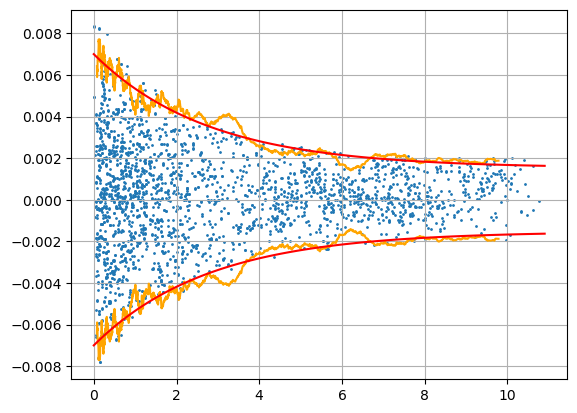

In [80]:
plt.scatter(d,z,s=1)
plt.plot(dvar, 2*zvar, color='orange')
plt.plot(dvar, -2*zvar, color='orange')

x = np.arange(0,11,0.1)
curve = popt[0]*np.exp(-popt[1]*x)+popt[2]
plt.plot(x, curve, color='red')
plt.plot(x, -curve, color='red')


plt.grid()
